# 使用DNN拟合非线性函数\n
在本Notebook中，我们使用一个简单的具有一个隐藏层的全连接神经网络（DNN）来拟合函数 $y=\\sin x$ 。该模型的隐藏层使用ReLU作为激活函数，并选择均方误差（MSE）作为回归任务的损失函数。

In [9]:
# 引入必要的包
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt



# 第一步：生成输入数据
在这里，我们生成区间 [-2π, 2π] 中的$x$值，并对应生成y值为 $\sin(x)$

In [10]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape(-1, 1)  # 在区间内生成1000个点
y = np.sin(x)  # 真实函数为sin(x)

# 输出生成的数据以便检查
print("输入数据 x 的前5个值：\n", x[:5])
print("目标函数 y=sin(x) 的前5个值：\n", y[:5])

# 将numpy数组转换为PyTorch的张量
x_tensor = torch.Tensor(x)
y_tensor = torch.Tensor(y)

# 输出转换后的张量数据以便检查
print("转换后的输入张量 x_tensor 的形状：", x_tensor.shape)
print("转换后的目标张量 y_tensor 的形状：", y_tensor.shape)


输入数据 x 的前5个值：
 [[-6.28318531]
 [-6.27060636]
 [-6.25802741]
 [-6.24544846]
 [-6.23286951]]
目标函数 y=sin(x) 的前5个值：
 [[2.44929360e-16]
 [1.25786178e-02]
 [2.51552454e-02]
 [3.77278927e-02]
 [5.02945704e-02]]
转换后的输入张量 x_tensor 的形状： torch.Size([1000, 1])
转换后的目标张量 y_tensor 的形状： torch.Size([1000, 1])


# 第二步：定义DNN模型
这个模型包含一个隐藏层，具有10个神经元，并使用ReLU激活函数

In [11]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(1, 50)  # 输入层（1维输入）到第一个隐藏层（50个神经元）
        self.fc2 = nn.Linear(50, 50) # 第二隐藏层（50个神经元）
        self.fc3 = nn.Linear(50, 1)  # 输出层
        self.relu = nn.ReLU()        # 使用ReLU激活函数

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out


# 第三步：初始化模型、损失函数和优化器

In [12]:
model = DNN()  # 实例化DNN模型
criterion = nn.MSELoss()  # 损失函数：均方误差（MSE）用于回归问题
optimizer = optim.Adam(model.parameters(), lr=0.01)  # 优化器：Adam算法

# 输出初始化模型结构
print("初始化模型结构：\n", model)



初始化模型结构：
 DNN(
  (fc1): Linear(in_features=1, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=1, bias=True)
  (relu): ReLU()
)


# 第四步：训练模型

In [13]:
num_epochs = 1000  # 设置训练轮数为1000
losses = []  # 用于存储每个epoch的损失值

for epoch in range(num_epochs):
    # 前向传播：通过模型将x_tensor输入，计算预测的y
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)  # 计算预测的y与真实y之间的损失
    
    # 反向传播及优化
    optimizer.zero_grad()  # 清零当前batch的梯度
    loss.backward()        # 进行反向传播以计算梯度
    optimizer.step()       # 使用优化器更新模型参数

    # 存储损失值
    losses.append(loss.item())

    # 每100个epoch打印一次当前的损失值
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        # 输出模型预测值的前5个结果
        print("模型预测的前5个值：\n", outputs[:5].detach().numpy())
        print("真实的目标值前5个值：\n", y[:5])


Epoch [100/1000], Loss: 0.0496
模型预测的前5个值：
 [[0.8957982 ]
 [0.8935317 ]
 [0.89126503]
 [0.88899857]
 [0.88673186]]
真实的目标值前5个值：
 [[2.44929360e-16]
 [1.25786178e-02]
 [2.51552454e-02]
 [3.77278927e-02]
 [5.02945704e-02]]
Epoch [200/1000], Loss: 0.0011
模型预测的前5个值：
 [[0.20237572]
 [0.20971218]
 [0.21704878]
 [0.22438549]
 [0.2317218 ]]
真实的目标值前5个值：
 [[2.44929360e-16]
 [1.25786178e-02]
 [2.51552454e-02]
 [3.77278927e-02]
 [5.02945704e-02]]
Epoch [300/1000], Loss: 0.0002
模型预测的前5个值：
 [[0.06158685]
 [0.07144013]
 [0.08129366]
 [0.09114756]
 [0.10100096]]
真实的目标值前5个值：
 [[2.44929360e-16]
 [1.25786178e-02]
 [2.51552454e-02]
 [3.77278927e-02]
 [5.02945704e-02]]
Epoch [400/1000], Loss: 0.0002
模型预测的前5个值：
 [[0.04447317]
 [0.05486887]
 [0.06526446]
 [0.07566009]
 [0.08605577]]
真实的目标值前5个值：
 [[2.44929360e-16]
 [1.25786178e-02]
 [2.51552454e-02]
 [3.77278927e-02]
 [5.02945704e-02]]
Epoch [500/1000], Loss: 0.0009
模型预测的前5个值：
 [[-0.04002328]
 [-0.02925902]
 [-0.01849469]
 [-0.00773025]
 [ 0.00303414]]
真实的目标值前5个

# 第五步：绘制损失函数随时间的变化
该图展示了随着模型训练，损失如何下降

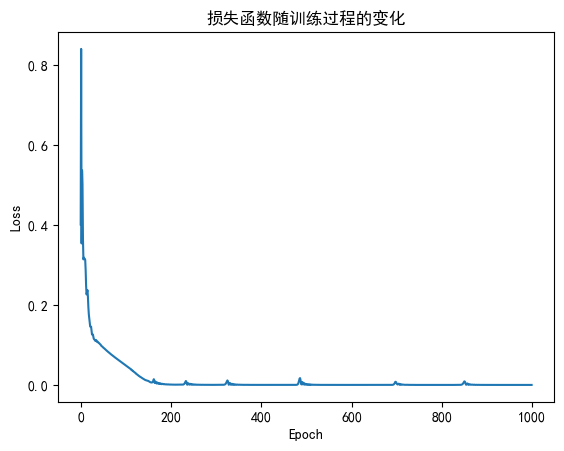

In [17]:
# 设置中文字体以防中文字符无法显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决坐标轴负号显示问题

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('损失函数随训练过程的变化')
plt.show()

# 第六步：可视化拟合结果
训练后，我们使用模型预测y的值，并将其与真实的sin(x)值绘制在一起

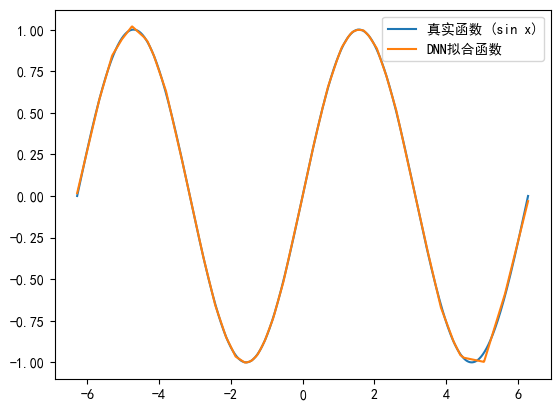

In [19]:
with torch.no_grad():  # 禁用梯度计算，进入评估模式
    predicted = model(x_tensor).numpy()  # 获取模型预测的y值

# 绘制真实函数和模型预测函数
plt.plot(x, y, label='真实函数 (sin x)')  # 真实sin(x)曲线
plt.plot(x, predicted, label='DNN拟合函数')  # DNN预测的曲线
plt.legend()
plt.savefig('result.pdf')
plt.show()
